

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br>
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br>
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [26]:
# присвоение датасетам переменных
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Courses and students/courses.csv', index_col=['Unnamed: 0'])
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Courses and students/course_contents.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Courses and students/progresses.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Courses and students/progress_phases.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Courses and students/students.csv')

#присвоение одинаковых названий столбцов столбцам с одниковыми значениями
df1.columns = ['course_id', 'course_title', 'course_field']
df3.columns = ['progress_id', 'student_id', 'course_id']
df5.columns = ['id_', 'student_id', 'city', 'birthday']

# объединение датасетов
df4 = df4.merge(df3, how = 'inner', on='progress_id')
df4 = df4.merge(df1, how='inner', on='course_id')
main = df4.merge(df2, how='inner', on=['course_id', 'module_number', 'lesson_number'])

main[main.student_id == '768c2987a744c51ce64a5993a2a94eaf'] # проверка основного датасета на корректность слияния

progress_id  module_number  lesson_number status  \
0     a387ab916f402cb3fbfffd29f68fd0ce              2              4   done   
96    a387ab916f402cb3fbfffd29f68fd0ce              1              1   done   
380   a387ab916f402cb3fbfffd29f68fd0ce              2              2   done   
479   a387ab916f402cb3fbfffd29f68fd0ce              1              4   done   
619   a387ab916f402cb3fbfffd29f68fd0ce              1              6   done   
746   a387ab916f402cb3fbfffd29f68fd0ce              2              1   done   
850   a387ab916f402cb3fbfffd29f68fd0ce              1              3   done   
995   a387ab916f402cb3fbfffd29f68fd0ce              2              5  start   
1091  a387ab916f402cb3fbfffd29f68fd0ce              1              2   done   
1254  a387ab916f402cb3fbfffd29f68fd0ce              1              5   done   
1383  a387ab916f402cb3fbfffd29f68fd0ce              2              3   done   

                         start_date                    finish_date  \
0     2018-06-23 08:28:50.681065+00  2018-06-23 08:28:52.439542+00   
96    2018-06-20 14:25:21.783762+00  2018-06-20 15:45:07.717209+00   
380   2018-06-23 08:18:09.653771+00  2018-06-23 08:18:12.784616+00   
479    2018-06-20 16:00:06.36178+00  2018-06-21 19:09:30.845034+00   
619   2018-06-21 19:10:36.957891+00  2018-06-28 15:59:25.320418+00   
746   2018-06-23 08:18:07.476199+00  2018-06-23 08:18:09.552181+00   
850   2018-06-20 15:58:22.132468+00  2018-06-20 16:00:06.127191+00   
995   2018-06-23 08:31:00.338883+00                            NaN   
1091  2018-06-20 15:45:07.976223+00  2018-06-20 15:58:21.886722+00   
1254  2018-06-21 19:09:31.117521+00  2018-06-21 19:10:36.707919+00   
1383  2018-06-23 08:18:12.890698+00  2018-06-23 08:28:50.564437+00   

                            student_id                         course_id  \
0     768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
96    768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
380   768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
479   768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
619   768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
746   768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
850   768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
995   768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
1091  768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
1254  768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
1383  768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   

            course_title course_field  \
0     Веб-дизайн PRO 2.0       Design   
96    Веб-дизайн PRO 2.0       Design   
380   Веб-дизайн PRO 2.0       Design   
479   Веб-дизайн PRO 2.0       Design   
619   Веб-дизайн PRO 2.0       Design   
746   Веб-дизайн PRO 2.0       Design   
850   Веб-дизайн PRO 2.0       Design   
995   Веб-дизайн PRO 2.0       Design   
1091  Веб-дизайн PRO 2.0       Design   
1254  Веб-дизайн PRO 2.0       Design   
1383  Веб-дизайн PRO 2.0       Design   

                                 module_title  \
0                       Концептуальный дизайн   
96    Специализация и личное позиционирование   
380                     Концептуальный дизайн   
479   Специализация и личное позиционирование   
619   Специализация и личное позиционирование   
746                     Концептуальный дизайн   
850   Специализация и личное позиционирование   
995                     Концептуальный дизайн   
1091  Специализация и личное позиционирование   
1254  Специализация и личное позиционирование   
1383                    Концептуальный дизайн   

                         lesson_title                          lesson_token  \
0                   Практика — мокапы  7df8adef-1259-4b72-9bf2-353c73389d06   
96                        Интро курса  df1a1f20-cdf7-443d-b25b-0a4b990b84d9   
380  

In [ ]:
main['course_id'].nunique()   #подсчет количества курсов

15

In [ ]:
 # количество модулей на каждом курсе
# main.groupby(['course_title'])['module_number'].max().reset_index().sort_values('module_number')
main.groupby(['course_title'])[['module_title', 'lesson_title']].nunique().sum()

module_title    228
lesson_title    981
dtype: int64

In [ ]:
# количество уроков в каждом модуле на каждом курсе
main.groupby(['course_title', 'module_title'])['lesson_number'].max().reset_index()\
.sort_values(['course_title','lesson_number'], ascending=(True, False))

course_title  \
1                    Excel Базовый   
2                    Excel Базовый   
6                    Excel Базовый   
0                    Excel Базовый   
3                    Excel Базовый   
..                             ...   
224  Руководитель digital-проектов   
225  Руководитель digital-проектов   
227  Руководитель digital-проектов   
213  Руководитель digital-проектов   
222  Руководитель digital-проектов   

                                          module_title  lesson_number  
1                            Основной функционал Excel             11  
2              Основной функционал Excel (продолжение)              7  
6    Формулы и функции Excel. Продолжаем работать с...              7  
0                            Визуализация данных Excel              5  
3                                Сводные таблицы Excel              5  
..                                                 ...            ...  
224                 Требовательность digital-продюсера              4  
225                                Управление временем              4  
227                         Экологичный путь менеджера              4  
213                          Аналитика. Базовые навыки              3  
222        Релиз-менеджмент: готовим проекты к запуску              3  

[228 rows x 3 columns]

In [ ]:
# медианное количество уроков в модуле на каждом курсе
df = main.groupby(['course_title', 'module_title'])['lesson_number'].max()
df = df.reset_index()
df.groupby('course_title')['lesson_number'].median().reset_index()

course_title  lesson_number
0                         Excel Базовый            5.0
1                      Java-разработчик            7.0
2               Java-разработчик c нуля           11.5
3                     JavaScript с нуля            7.0
4   PHP-разработчик с 0 до PRO. Часть 1            4.0
5              SMM-маркетолог от А до Я            6.0
6                             UX-дизайн            3.5
7                  Анимация интерфейсов            3.0
8        Веб-вёрстка для начинающих 2.0            7.0
9                    Веб-дизайн PRO 2.0            5.0
10                   Веб-дизайн Базовый            3.0
11                Веб-дизайн с нуля 2.0            4.0
12                      Веб-разработчик            2.0
13        Интернет-маркетолог от Ingate            6.5
14        Руководитель digital-проектов            5.0

In [ ]:
# количество учеников на каждом курсе
df7 = main.groupby('course_title')['student_id'].nunique()
df7

course_title
Excel Базовый                          147
Java-разработчик                       172
Java-разработчик c нуля                117
JavaScript с нуля                      180
PHP-разработчик с 0 до PRO. Часть 1    190
SMM-маркетолог от А до Я               103
UX-дизайн                              240
Анимация интерфейсов                   144
Веб-вёрстка для начинающих 2.0         395
Веб-дизайн PRO 2.0                     375
Веб-дизайн Базовый                     107
Веб-дизайн с нуля 2.0                  425
Веб-разработчик                        140
Интернет-маркетолог от Ingate          439
Руководитель digital-проектов          155
Name: student_id, dtype: int64

In [ ]:
# подготовка датафрейма students.csv для выявления возрастов
df5 = df5.dropna().sort_values('birthday').drop(['id_'], axis=1)
df5['birthday'] = pd.to_datetime(df5['birthday'], errors='coerce')
df5 = df5.dropna()
df5['age'] = (pd.Timestamp('now') - df5['birthday']).astype('<m8[Y]')
df5 = df5.drop(df5[(df5.age < 17) | (df5.age > 60)].index)


# минимальный, максимальный, средний, медианный возраст студентов
df5.agg({'age':['min', 'max', 'mean', 'median']})

age
min     17.000000
max     60.000000
mean    33.032707
median  32.000000

In [ ]:
# Объединения датафрейма из students.csv с основным для выявления возрастов отдельно по курсам
df6 = main.merge(df5, how='inner', on='student_id')


# минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
df6.groupby('course_title').agg({'age':['min', 'max', 'median']})

age             
                                      min   max median
course_title                                          
Excel Базовый                        25.0  55.0   36.0
Java-разработчик                     18.0  58.0   31.0
Java-разработчик c нуля              19.0  55.0   32.0
JavaScript с нуля                    20.0  52.0   29.0
PHP-разработчик с 0 до PRO. Часть 1  19.0  59.0   32.0
SMM-маркетолог от А до Я             24.0  51.0   31.0
UX-дизайн                            21.0  52.0   32.0
Анимация интерфейсов                 20.0  52.0   34.0
Веб-вёрстка для начинающих 2.0       20.0  59.0   31.0
Веб-дизайн PRO 2.0                   20.0  51.0   31.0
Веб-дизайн Базовый                   21.0  54.0   32.0
Веб-дизайн с нуля 2.0                20.0  55.0   30.0
Веб-разработчик                      17.0  53.0   29.0
Интернет-маркетолог от Ingate        20.0  55.0   33.0
Руководитель digital-проектов        26.0  49.0   34.0

In [ ]:
df6.groupby('course_title')['age'].mean().round()

course_title
Excel Базовый                          37.0
Java-разработчик                       32.0
Java-разработчик c нуля                33.0
JavaScript с нуля                      29.0
PHP-разработчик с 0 до PRO. Часть 1    34.0
SMM-маркетолог от А до Я               34.0
UX-дизайн                              33.0
Анимация интерфейсов                   34.0
Веб-вёрстка для начинающих 2.0         32.0
Веб-дизайн PRO 2.0                     32.0
Веб-дизайн Базовый                     33.0
Веб-дизайн с нуля 2.0                  32.0
Веб-разработчик                        30.0
Интернет-маркетолог от Ingate          34.0
Руководитель digital-проектов          35.0
Name: age, dtype: float64

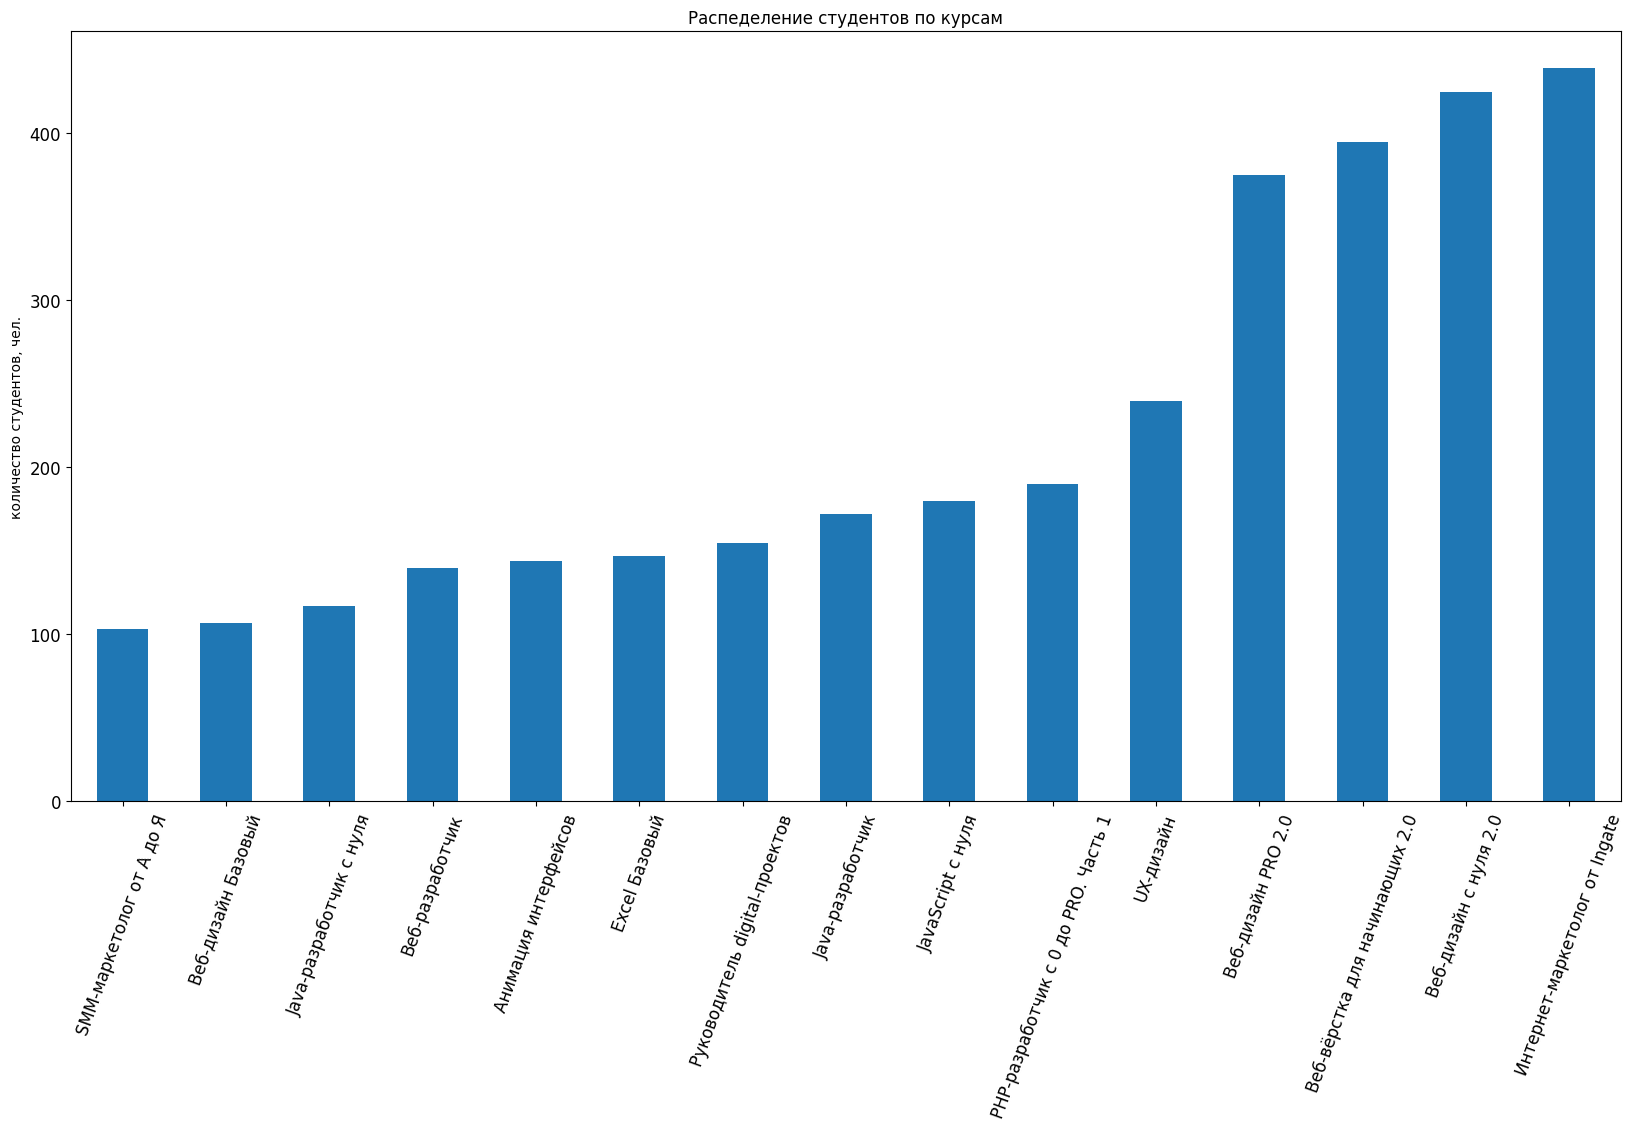

In [ ]:
# Построим график распределния студентов по курсам

df7=df7.reset_index().sort_values('student_id')

ax = df7.plot.bar(x='course_title', y='student_id', figsize=(20,10), rot=70, fontsize=12, legend=False,
                  title = 'Распеделение студентов по курсам')
ax.set(ylabel='количество студентов, чел.', xlabel=None)
plt.show()

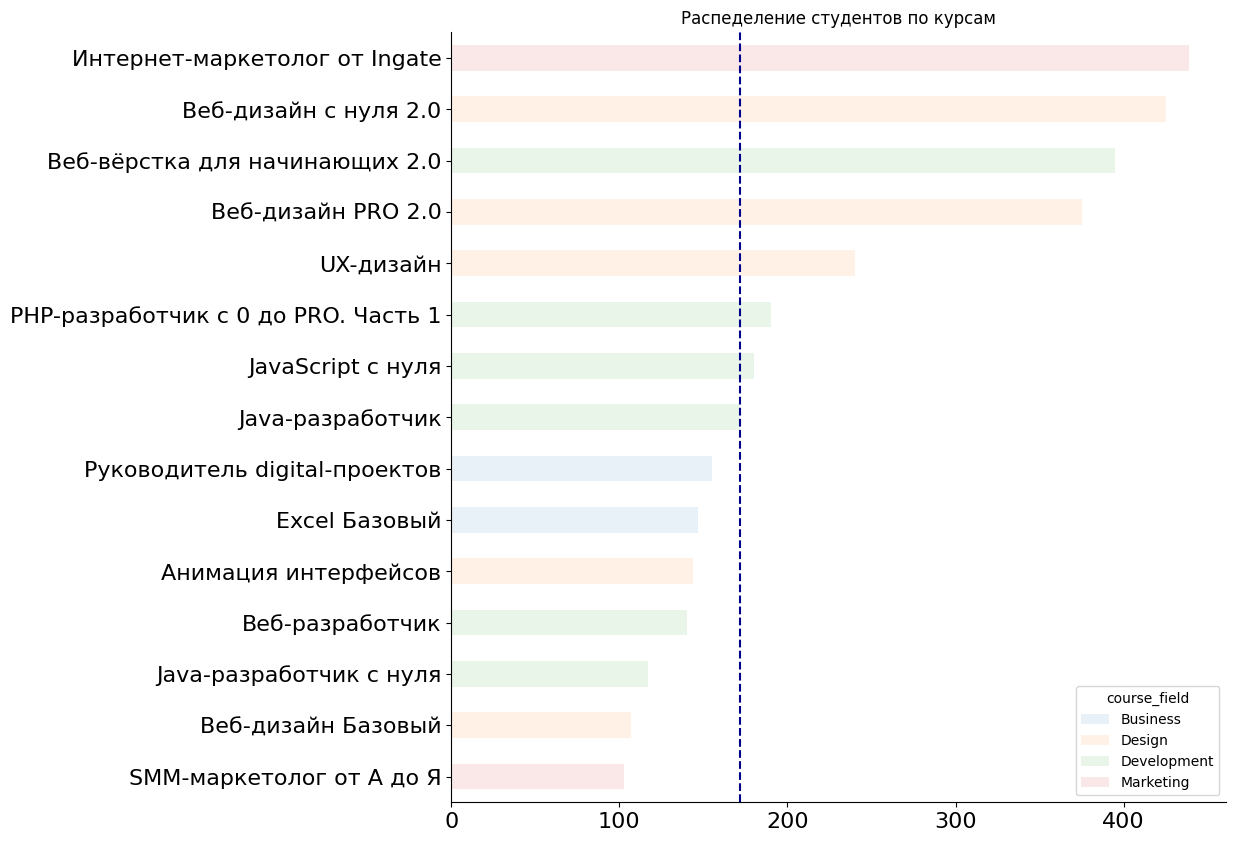

In [ ]:
df8 = pd.pivot_table(main, values='student_id',
                           index = 'course_title',
                           columns ='course_field',
                           aggfunc=lambda x: x.unique().size,
                           margins=True).sort_values('All')\
                           .drop(index=['All'], columns=['All'])

fig, ax=plt.subplots(figsize=(10,10))
ax = df8.plot.barh(title='Распеделение студентов по курсам', ax=ax, fontsize=16, stacked=True, alpha=0.1)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set(xlabel=None, ylabel=None)
df8 = df8.stack().reset_index()
ax.axvline(df8[0].median(), linestyle='--', color ='darkblue')
plt.show()

Датасет состоит из 15 курсов, включающих в себя 229 блоков, состоящих в общем из 993 уроков. Наибольшим спросом пользуются
такие курсы как 'Веб-дизайн с нуля 2.0'  (2014 человек) и 'Интернет-маркетолог от Ingate' (2168 человек), наименнее популярны
'SMM-маркетолог от А до Я' и 'Веб-дизайн Базовый', данными курсами интересуются около 500 человек на каждый курс, однако
стоить отметить что все курсы в равной степени интересны людям абсолютно разных возрастов, так как их минимальные, максимальные
и средние значения примерно одинаковы. Как показывает диаграмма распределения студентов по курсам, наиболее интересными
направлениями считаются интернет-маркетинг и дизайн, в то время как  бизнес и разработка уходят на второй план,  
что вероятно обусловлено перенасыщением представителей данных направлений на рынке труда или переходом к более инновационным
инструментам работы в данных областях, а это в свою очередь приводит к освоению новых инструментов работы с информацией, либо
к смене сферы деятельности.

## 2. Расчет потенциальной нагрузки на преподавателей

1. Рассчитаем прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Дату начала прохождения курса студентом будем считать дату начала первой домашней работы.
2. На основании первого пункта построим график с приростом студентов в каждом месяце для каждого курса и line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса.
4. Рассчитаем количество прогрессов по выполнению домашних работ в каждом месяце за всю историю для каждого курса, учитывая, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз будем включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз) и построим графики по каждому курсу отдельно и по всем курсам вместе.
5. На основании рассчитанных значений сделаем аналитический вывод на основе всех полученных показателей

In [ ]:
# Выделим данные для работы в отдельный датасет
main_original = main.copy()
main = main_original[main_original['is_homework']==True].copy()
main['start_date'] = pd.to_datetime(main.start_date)
main['finish_date'] = pd.to_datetime(main.finish_date)
main['YearMonth']= main['start_date'].values.astype('datetime64[M]')
main['YearMonth'] = main['YearMonth'].dt.to_period('M')

# первая дз на курсе
n_of_1st_hw = main.groupby(['course_title']).agg({'module_number':['min']}).reset_index()
n_of_1st_hw.columns = n_of_1st_hw.columns.droplevel(0)
n_of_1st_hw.columns = ['course_title', 'module_number']

# Отсортируем датафрейм с помощью объединения с дф только с номерами первых дз на каждом курсе
main_sorted = main.merge(n_of_1st_hw, left_on=['course_title','module_number'],
                                      right_on=['course_title','module_number'])
main_sorted = main_sorted.groupby(['course_title', 'YearMonth'])['YearMonth'].count() \
                                                                             .unstack(fill_value=0).stack() \
                                                                             .to_frame().reset_index()


main_sorted.columns = ['course_title','year_and_month','growth']
main_sorted.head()

# Расчет прироста студентов на каждом курсе в каждом месяце
for item in main_sorted['course_title'].unique():
    indexes = main_sorted.loc[main_sorted['course_title']==item, 'growth'].keys()
    for index in indexes:
        main_sorted.loc[index, 'student_increment'] = main_sorted.loc[indexes[0]:index, 'growth'].sum()
main_sorted.query('student_increment > 0').head()

course_title year_and_month  growth  student_increment
3  Excel Базовый        2018-02       2                2.0
4  Excel Базовый        2018-03       1                3.0
5  Excel Базовый        2018-04       0                3.0
6  Excel Базовый        2018-05       1                4.0
7  Excel Базовый        2018-06       3                7.0

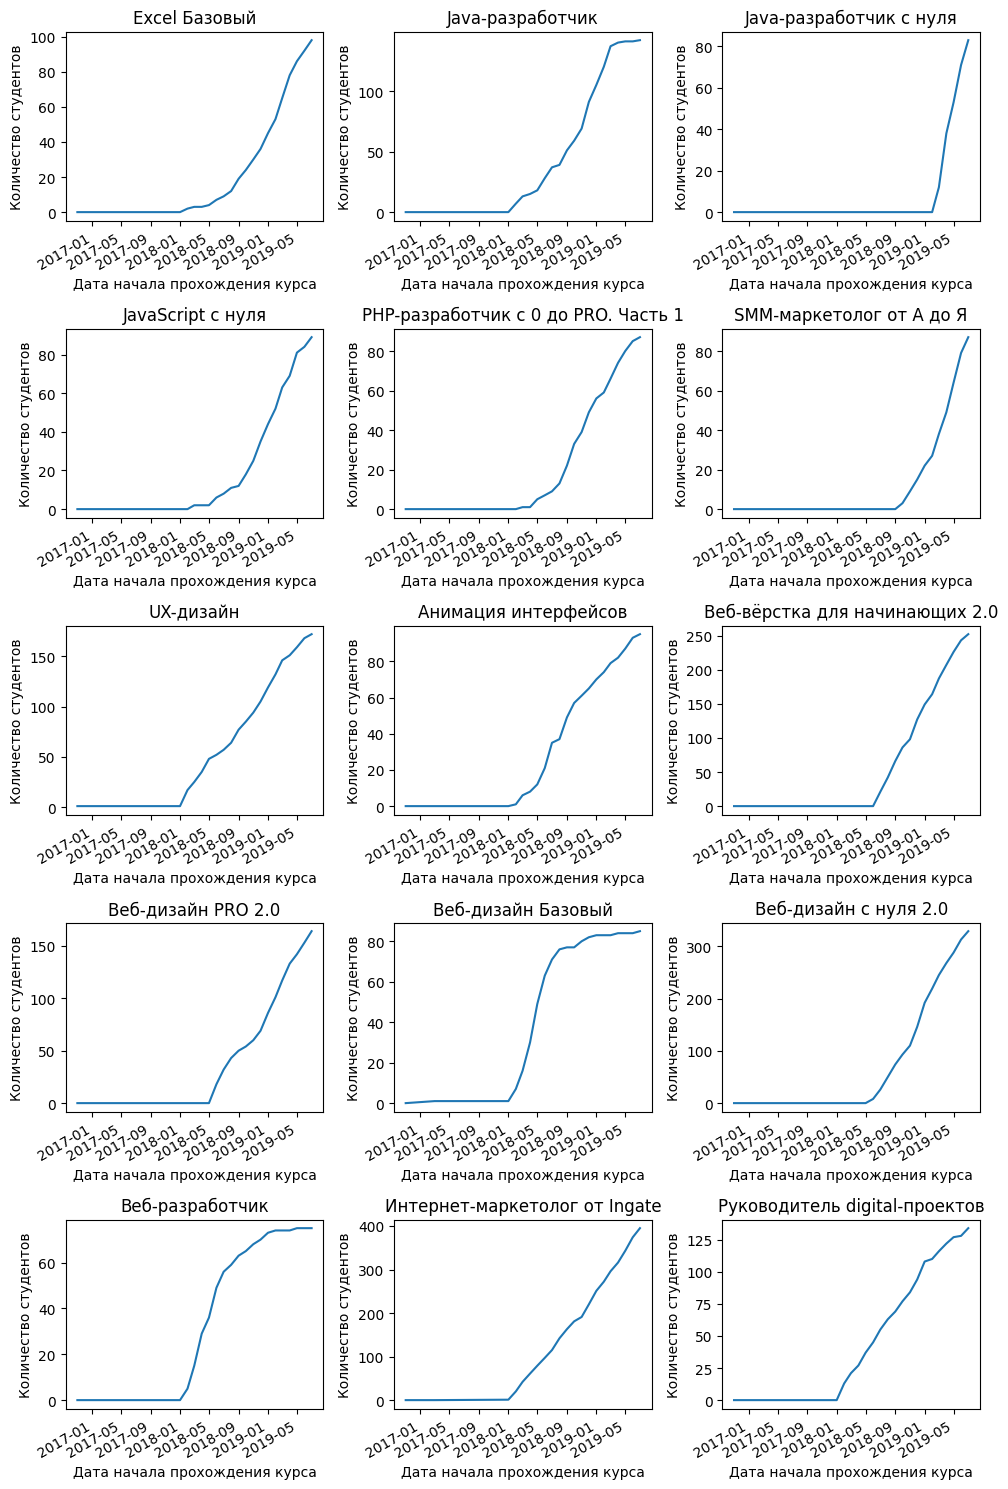

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(10, 15))

# Определение списка курсов
titles = main_sorted['course_title'].unique()

for index, ax in enumerate(axes.flat):
    # Вывод графика на страницу
    plot_df = main_sorted[main_sorted['course_title']==titles[index]]\
                          .pivot_table('student_increment',
                          index='year_and_month')

    plot_df.plot(ax=ax, title=titles[index], legend=False, x_compat=True)
    # Подписание осей координат
    ax.set_xlabel('Дата начала прохождения курса')
    ax.set_ylabel('Количество студентов')

fig.tight_layout()
plt.show()

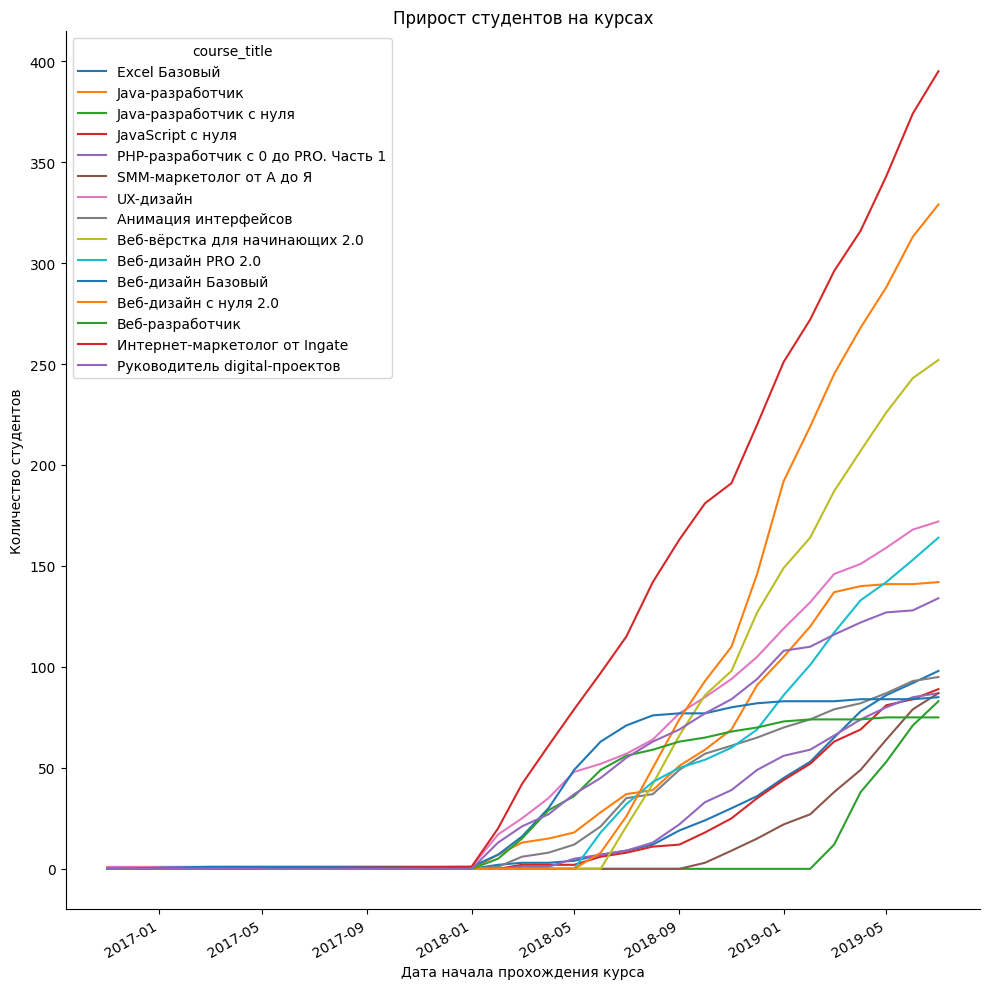

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

for title in main_sorted['course_title'].unique():
    # Вывод графика на страницу
    plot_df = main_sorted[main_sorted['course_title']==title].pivot_table('student_increment',
                                                                           index='year_and_month',
                                                                           columns='course_title')
    plot_df.plot(ax=ax, x_compat=True)

# Подписание осей координат и заголовка
ax.set_title('Прирост студентов на курсах')
ax.set_xlabel('Дата начала прохождения курса')
ax.set_ylabel('Количество студентов')

# Отключение верхней и правой границ
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

fig.tight_layout()
plt.show()

In [ ]:
# Выделим данные для расчета прогресса в отдельный датафрейм
progress_df = main.loc[main['is_homework']==True, ['course_title', 'status', 'start_date', 'finish_date']].copy()

# Преобразование формата дат
progress_df['start_date'] = progress_df['start_date'].values.astype('datetime64[M]')
progress_df['finish_date'] = progress_df['finish_date'].values.astype('datetime64[M]')
progress_df['finish_date'] = progress_df['finish_date'] + pd.tseries.offsets.MonthEnd(0)

# Указание дат окончания для несданных и незавершенных работ
progress_df.loc[progress_df['status']=='fail', 'finish_date'] = progress_df['start_date'] + pd.tseries.offsets.MonthEnd(0)
progress_df.loc[progress_df['status']=='start', 'finish_date'] = progress_df['finish_date'].max()
progress_df.loc[progress_df['status']=='wait', 'finish_date'] = progress_df['finish_date'].max()

# приводим все значения к первой дате месяца
progress_df['start_date'] = progress_df['start_date']\
                                        .apply(lambda x: pd.Timestamp(x)
                                        + pd.tseries.offsets.Day()
                                        - pd.tseries.offsets.MonthBegin())

progress_df['finish_date'] = progress_df[['start_date','finish_date']]\
                                          .apply(lambda x: pd.Timestamp(x['start_date'])
                                          - pd.tseries.offsets.Day()
                                          + pd.tseries.offsets.MonthEnd()
                                          if pd.isna(x['finish_date'])
                                          else x['finish_date'],axis=1)

# делаем список месяцев, в которых выполнялось каждое дз
progress_df['time']=progress_df[['start_date','finish_date']].apply(lambda x:
                                                                    list(pd.date_range(start=x['start_date'],
                                                                    periods= mt.ceil((x['finish_date']
                                                                    - x['start_date'])/np.timedelta64(1, 'M')),
                                                                    freq='M')),axis=1)
progress_df = progress_df.explode('time')
progress_df['time']= progress_df['time'].dt.to_period('M')

# формирование датасета с подсчетом дз по курсам по месяцам
workload = progress_df.groupby(['course_title','time'])['course_title'].count().unstack().stack().to_frame().reset_index()
workload.columns = ['title','year_and_month', 'workload']
workload.head(10)


title year_and_month  workload
0  Excel Базовый        2018-02      17.0
1  Excel Базовый        2018-03       4.0
2  Excel Базовый        2018-04       8.0
3  Excel Базовый        2018-05       6.0
4  Excel Базовый        2018-06      18.0
5  Excel Базовый        2018-07      13.0
6  Excel Базовый        2018-08      20.0
7  Excel Базовый        2018-09      42.0
8  Excel Базовый        2018-10      51.0
9  Excel Базовый        2018-11      41.0

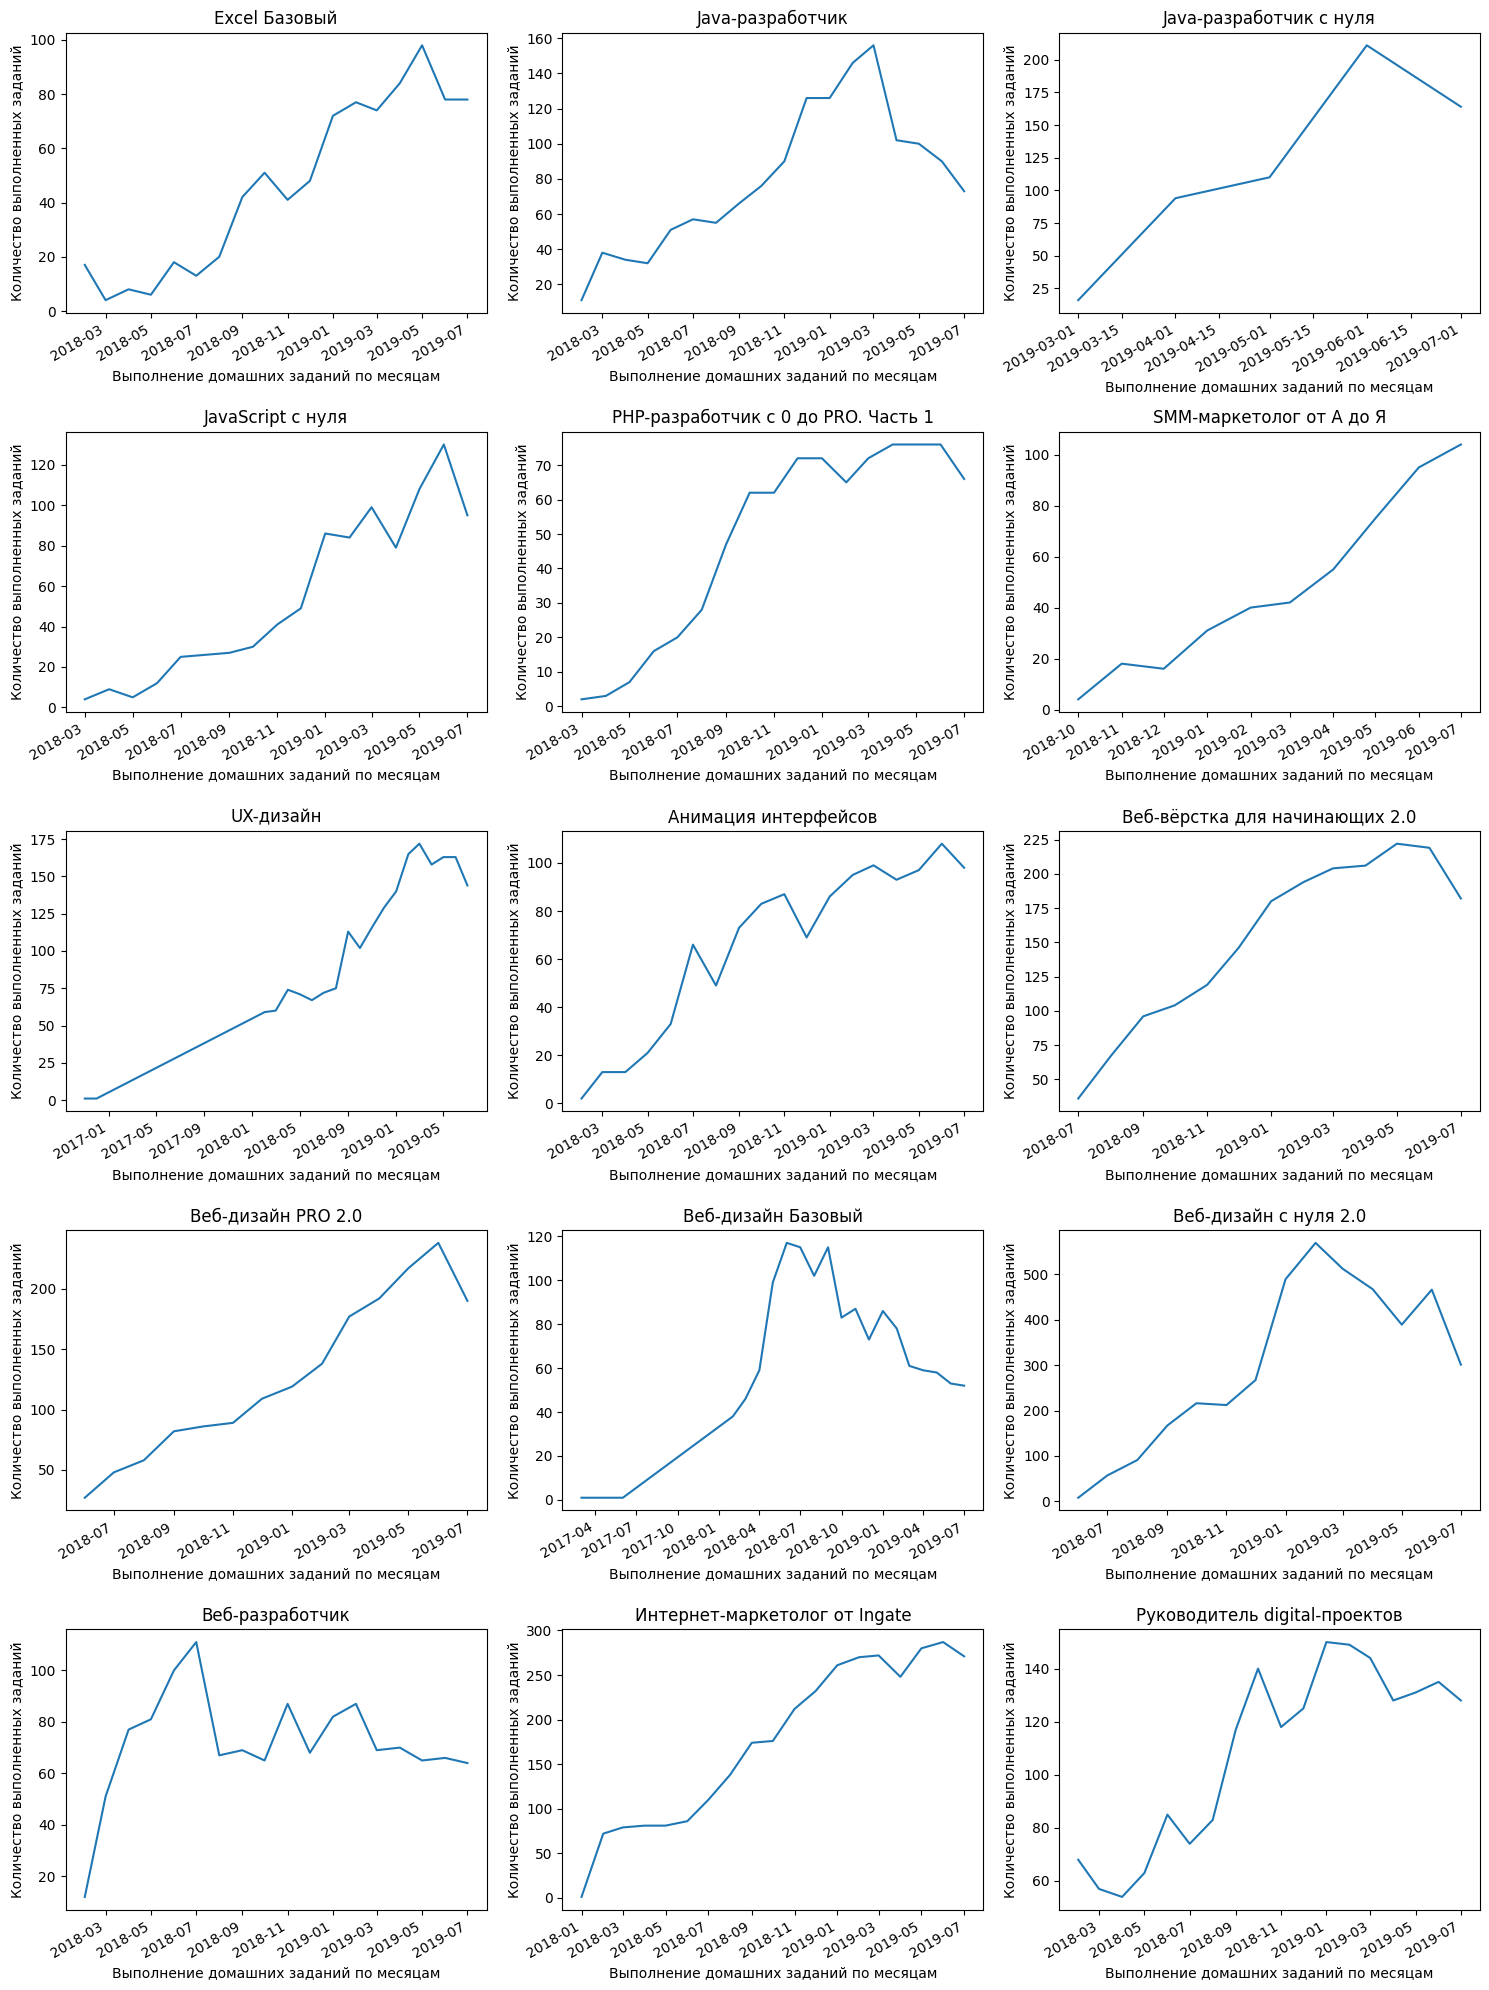

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

# Определение списка курсов
titles = workload['title'].unique()

for index, ax in enumerate(axes.flat):
    # Вывод графика на страницу
    plot_df = workload[workload['title']==titles[index]].pivot_table('workload',
                                                                     index='year_and_month')
    plot_df.plot(ax=ax, title=titles[index], legend=False, x_compat=True)
    # Подписание осей координат
    ax.set_xlabel('Выполнение домашних заданий по месяцам')
    ax.set_ylabel('Количество выполненных заданий')

fig.tight_layout()
plt.show()

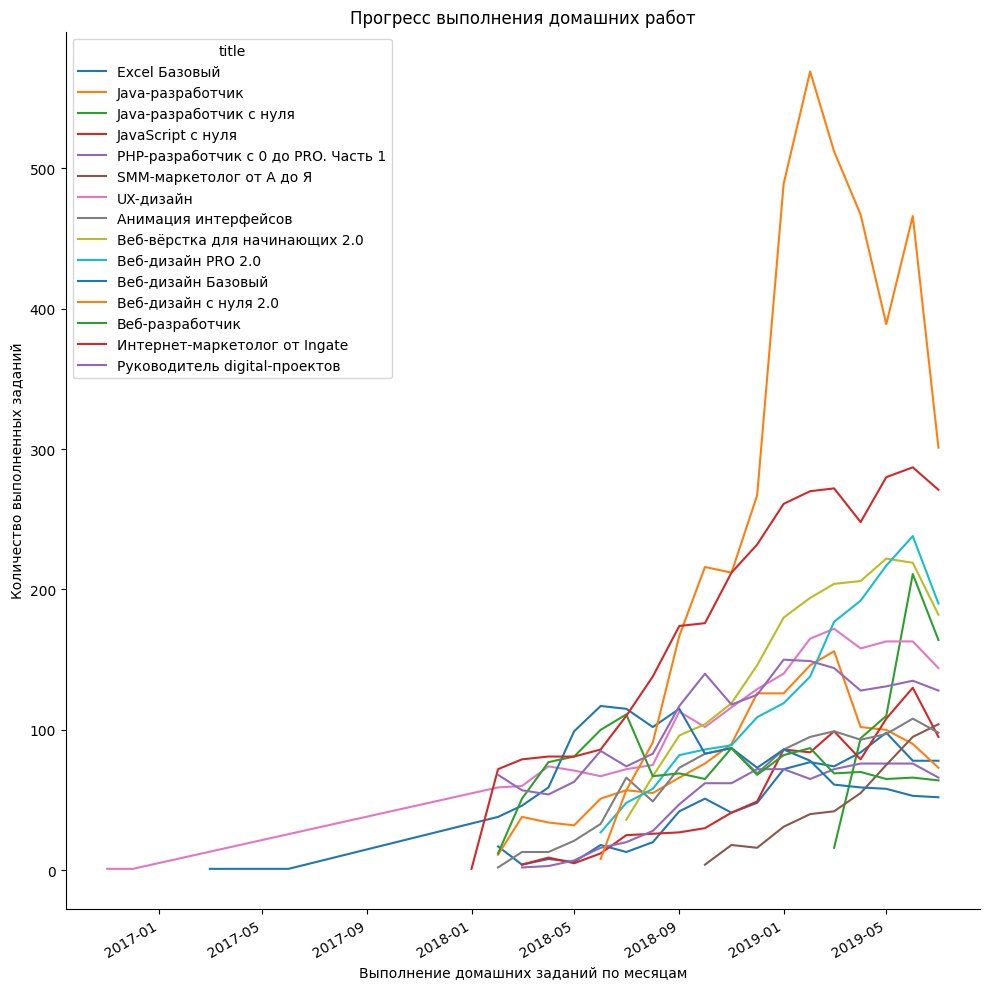

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

for title in workload['title'].unique():
    # Вывод графика на страницу
    plot_df = workload[workload['title']==title].pivot_table('workload',
                                                             index='year_and_month',
                                                             columns='title')
    plot_df.plot(ax=ax, x_compat=True)

# Подписание осей координат и заголовка
ax.set_title('Прогресс выполнения домашних работ')
ax.set_xlabel('Выполнение домашних заданий по месяцам')
ax.set_ylabel('Количество выполненных заданий')
# Отключение верхней и правой границ
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

fig.tight_layout()
plt.show()

Как видно из  графиков, прирост студентов начинается с января 2018го года, наибольший прирост студентов наблюдается
на курсах "Интернет-маркетолог от ingate" и "Web-дизайн с нуля 2.0", наименьший прирост идет на курсы "SMM-маркетолог от А до Я"
и "Анимация интерфейсов". Что касается выполненных домашних заданий, во временном периоде картина примерно такая же, как и с
приростом студентов. Наибольшее число выполненных работ приходится на курсы "Web-дизайн с нуля 2.0" и "Интернет-маркетолог от
ingate", наименьшее - у курсов "Анимация интерфейсов" и "PHP-разработчик с 0 до PRO. Часть 1". Что касается общей картины
сдачи домашних работ - она примерно одинаковая для всех курсов - по истечении 3-4 месяцев почти у всех курсов динамика
выполнения домашних заданий, за некоторым исключением, идет на спад

## 3. Выявление проблемных модулей

1. Рассчитаем минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то будем считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. На основании первого пункта построим график с медианным временем прохождения каждого модуля для каждого курса.
3. Чтобы выявить сезонность, посчитаем медианное время выполнения домашней работы по месяцам для каждого курса.
4. Построим график, на который будут нанесены линии с медианным временем выполнения домашней работы по месяцам для каждого курса.
5. На основании рассчитанных значений сделаем аналитический вывод

In [ ]:
# Формирование датасета в разрезе модулей и курсов
modules_df = main.loc[(main['is_homework']==True) & (main['finish_date'].notnull()),
                         ['course_title', 'module_title', 'start_date', 'finish_date']]

# Определение времени прохождения каждого модуля для каждого курса
modules_df['duration'] = (modules_df['finish_date'] - modules_df['start_date']).dt.days

# Очистка датасета от "аномальных" данных
modules_df = modules_df.query('finish_date >= start_date')

# Вывод статистики по прохождении каждого модуля и курса
modules_df.groupby(['course_title', 'module_title']).aggregate(
    {'start_date': np.min, 'finish_date': np.max, 'duration': [np.min, np.max, np.mean, np.median]}
).reset_index().sort_values(
    ['course_title', ('start_date', 'amin')]
).head()


course_title                                       module_title  \
                                                                      
1  Excel Базовый                          Основной функционал Excel   
2  Excel Базовый            Основной функционал Excel (продолжение)   
5  Excel Базовый                  Формулы и функции Excel. Введение   
6  Excel Базовый  Формулы и функции Excel. Продолжаем работать с...   
4  Excel Базовый     Формулы и функции Excel. Более сложные формулы   

                        start_date                      finish_date duration  \
                              amin                             amax     amin   
1 2018-02-19 12:32:48.645567+00:00 2019-07-16 06:09:30.029391+00:00        0   
2 2018-02-19 12:33:16.386750+00:00 2019-07-16 06:09:55.943086+00:00        0   
5 2018-02-19 12:33:20.668728+00:00 2019-07-16 05:31:30.237389+00:00        0   
6 2018-02-19 12:33:34.459174+00:00 2019-07-13 08:38:24.039816+00:00        0   
4 2018-02-19 12:33:48.839892+00:00 2019-07-17 02:19:48.673621+00:00        0   

                         
  amax      mean median  
1   97  5.096386    2.0  
2   52  4.115385    1.0  
5   17  1.987179    1.0  
6   91  6.719298    2.0  
4   33  6.000000    3.0

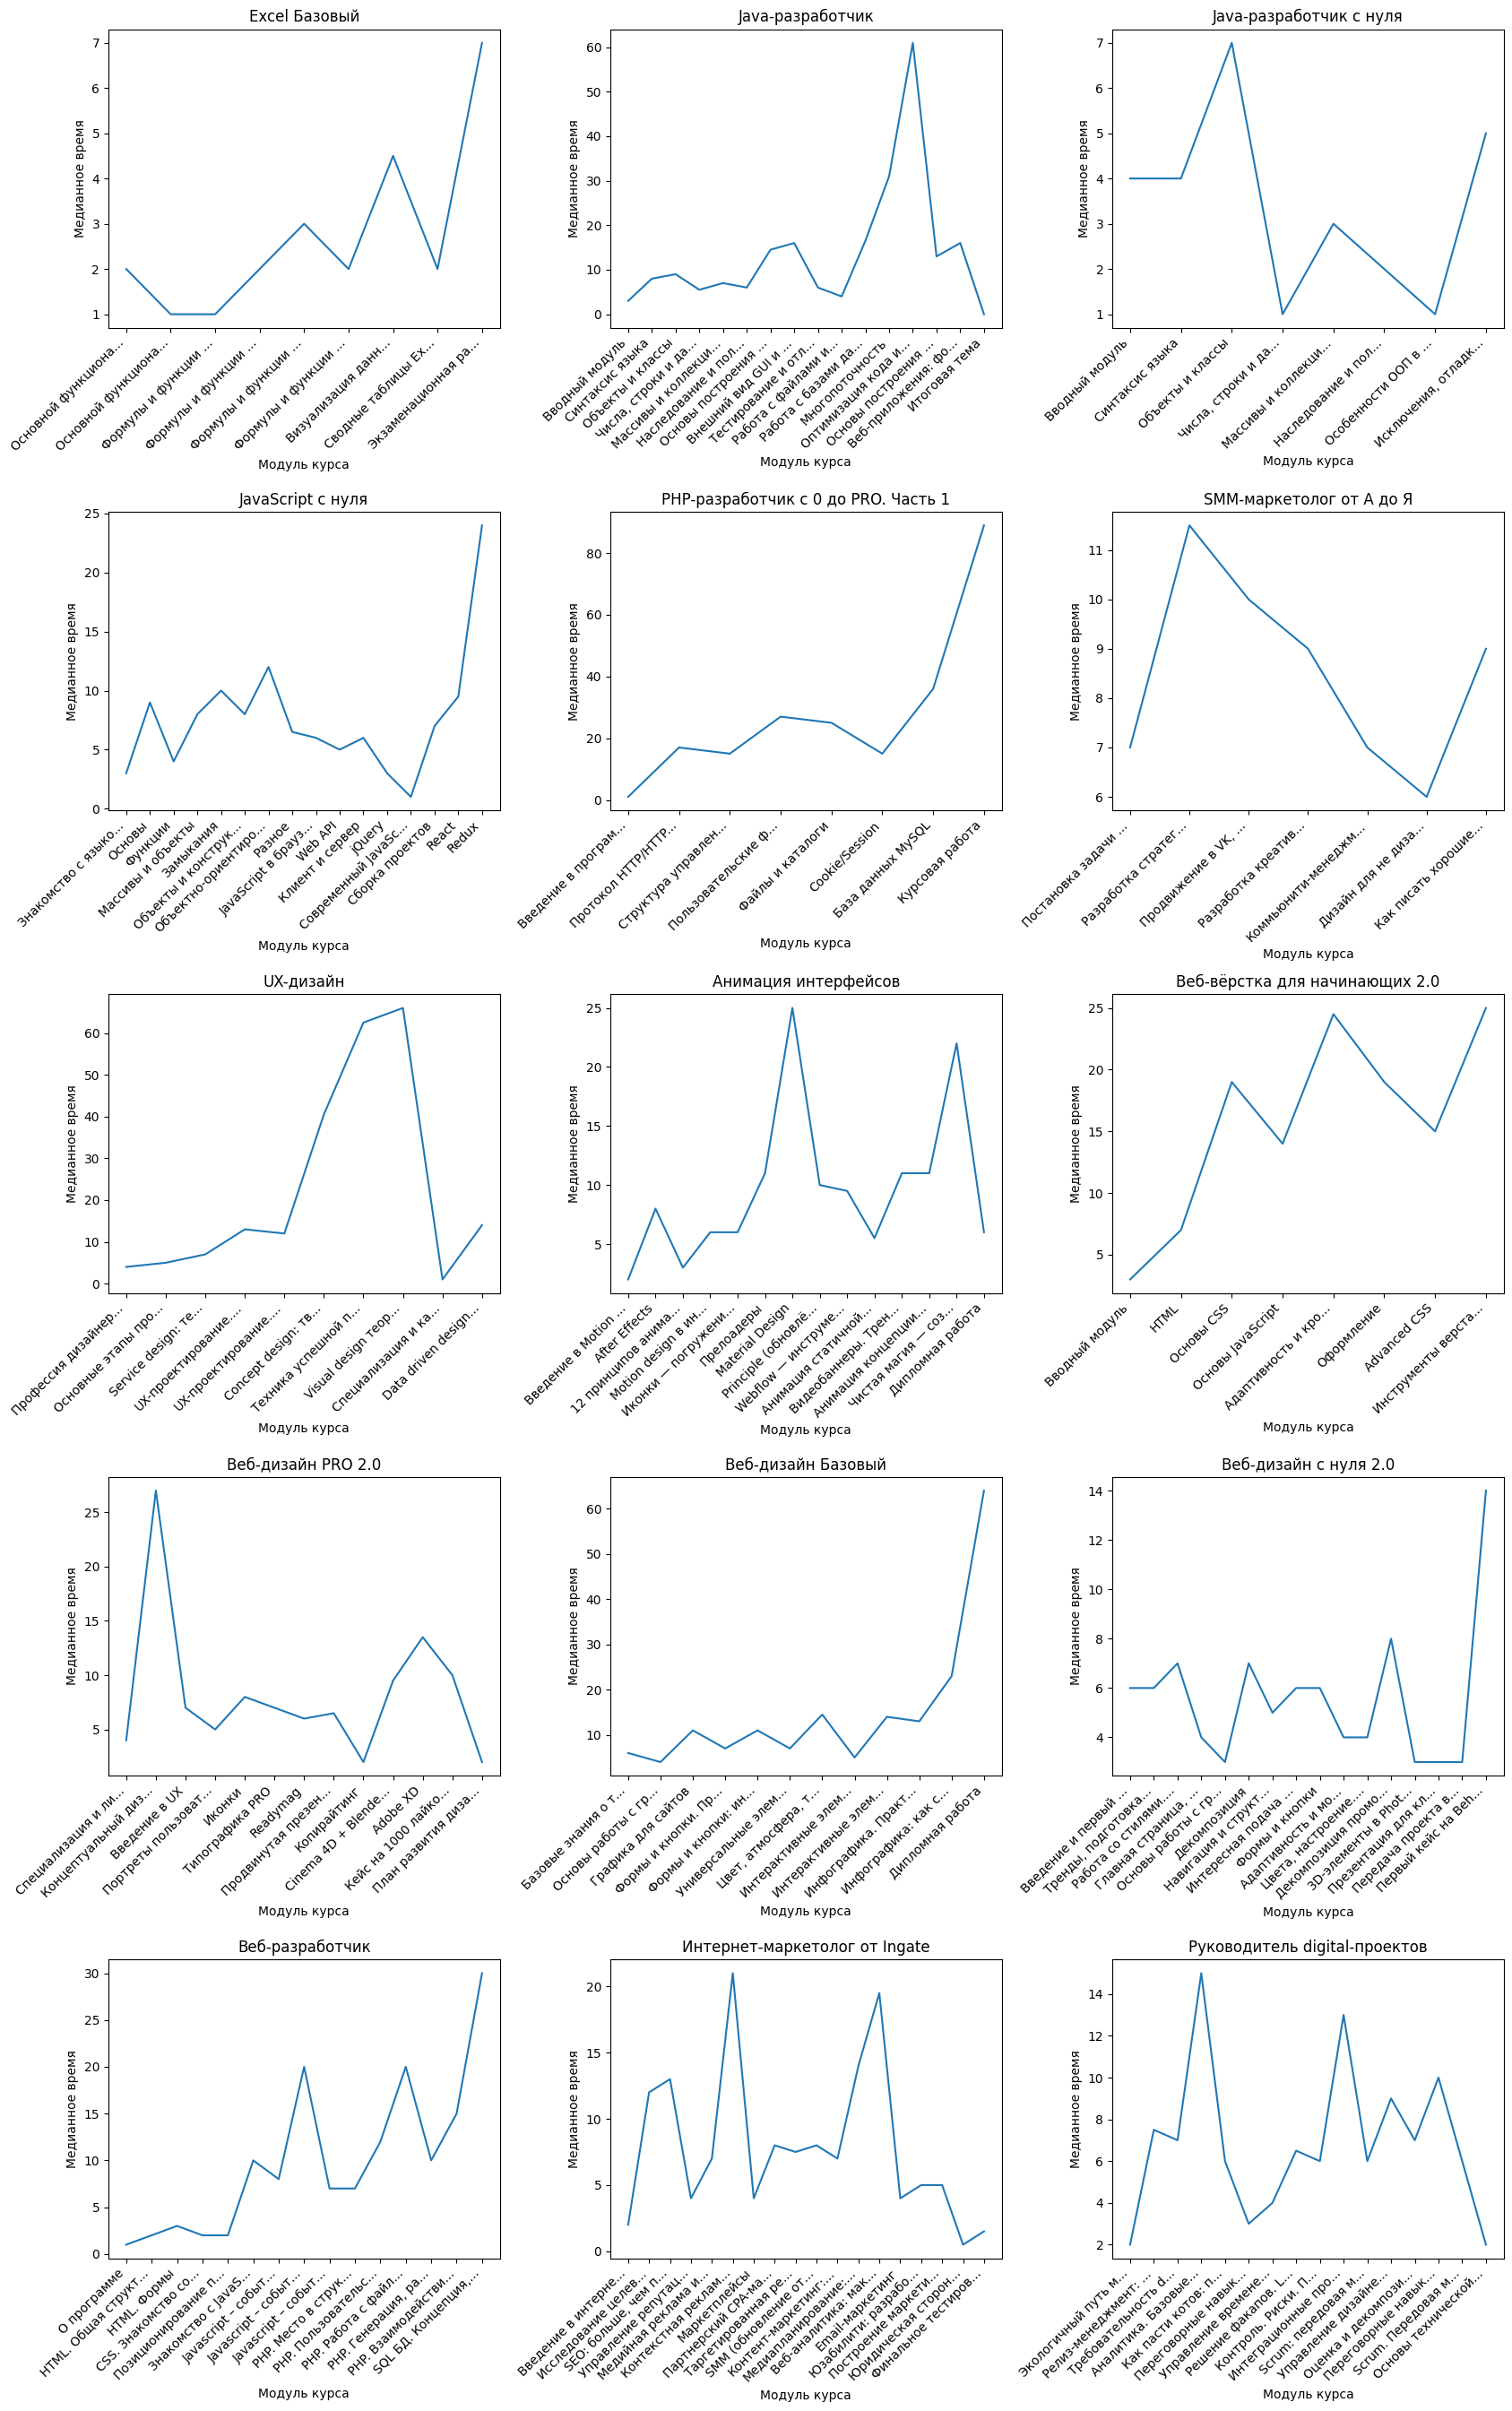

In [ ]:
# Создание основных объектов графика
fig, axes = plt.subplots(5, 3, figsize=(17, 27))

# Формирование списка курсов
titles = np.sort(modules_df['course_title'].unique())

# Расчет медианного времени прохождения каждого модуля для каждого курса
chart_df = modules_df.groupby(['course_title', 'module_title']).aggregate(
    {'start_date': np.min, 'finish_date': np.max, 'duration': np.median}
).sort_values(
    ['course_title', 'start_date']
).reset_index()

# Вывод диаграмм на страницу
for index, ax in enumerate(axes.flat):
    # Вывод графика медианного времени прохождения модуля для курса из списка
    ax.plot(chart_df[chart_df['course_title']==titles[index]].index.astype(str),
            chart_df.loc[chart_df['course_title']==titles[index], 'duration'])
    # Вывод подписей делений оси абсцисс
    ax.set_xticklabels(
        chart_df.loc[chart_df['course_title']==titles[index], 'module_title'].apply(
            lambda x: x[:18] + '...' if len(x) > 18 else x),
        rotation=45, ha='right')
    # Вывод заголовка диаграммы
    ax.set_title(titles[index])
    # Вывод подписей осей координат
    ax.set_xlabel('Модуль курса')
    ax.set_ylabel('Медианное время')

# Автоматическое позиционирование элементов графика
fig.tight_layout()
plt.show()

In [ ]:
# Определение месяца завершения выполнения домашнего задания
modules_df['homework_month'] = modules_df['finish_date'].apply(lambda x: dt.date(2020, x.month, 1))

# Вывод медианного времени выполнения домашней работы в разрезе месяцев
modules_df.pivot_table('duration', index='homework_month', columns='course_title', aggfunc=np.median)

course_title    Excel Базовый  Java-разработчик  Java-разработчик c нуля  \
homework_month                                                             
2020-01-01                2.0               5.0                      NaN   
2020-02-01                2.0               5.0                      NaN   
2020-03-01                2.0               5.0                      4.5   
2020-04-01                1.0               9.0                      2.0   
2020-05-01                2.0              13.0                      5.0   
2020-06-01                2.0              10.0                      3.0   
2020-07-01                2.0              17.0                      2.0   
2020-08-01                2.0               9.0                      NaN   
2020-09-01                3.0               5.0                      NaN   
2020-10-01                1.0              12.0                      NaN   
2020-11-01                2.0               8.0                      NaN   
2020-12-01                2.0               3.0                      NaN   

course_title    JavaScript с нуля  PHP-разработчик с 0 до PRO. Часть 1  \
homework_month                                                           
2020-01-01                    4.0                                 18.0   
2020-02-01                    6.0                                 28.0   
2020-03-01                    3.0                                 21.5   
2020-04-01                    8.0                                 19.0   
2020-05-01                    4.5                                 14.0   
2020-06-01                    5.0                                  6.0   
2020-07-01                    7.5                                  8.0   
2020-08-01                    9.0                                  6.0   
2020-09-01                    9.0                                  3.5   
2020-10-01                    7.5                                 13.0   
2020-11-01                    9.0                                 19.5   
2020-12-01                    5.0                                 14.0   

course_title    SMM-маркетолог от А до Я  UX-дизайн  Анимация интерфейсов  \
homework_month                                                              
2020-01-01                          19.5       17.5                  10.0   
2020-02-01                           9.5        1.0                   5.0   
2020-03-01                          15.0       13.0                   8.0   
2020-04-01                           7.0       10.0                   4.0   
2020-05-01                           7.5        7.0                  12.0   
2020-06-01                           7.5        9.0                   5.0   
2020-07-01                           9.0        9.0                   6.0   
2020-08-01                           NaN        6.5                   7.0   
2020-09-01                           NaN        7.5                   4.5   
2020-10-01                           3.0       23.0                   4.0   
2020-11-01                          17.0       12.0                   6.0   
2020-12-01                          12.0        9.0                  14.0   

course_title    Веб-вёрстка для начинающих 2.0  Веб-дизайн PRO 2.0  \
homework_month                                                       
2020-01-01                                 9.0                 6.0   
2020-02-01                                12.0                16.5   
2020-03-01                                 7.0                 4.0   
2020-04-01                                 8.0                 6.0   
2020-05-01                                 9.0                 5.0   
2020-06-01                                15.0                 5.0   
2020-07-01                                 5.5                 8.0   
2020-08-01                                 7.0                24.0   
2020-09-01                                 5.0                34.0   
2020-10-01                                 9.0   

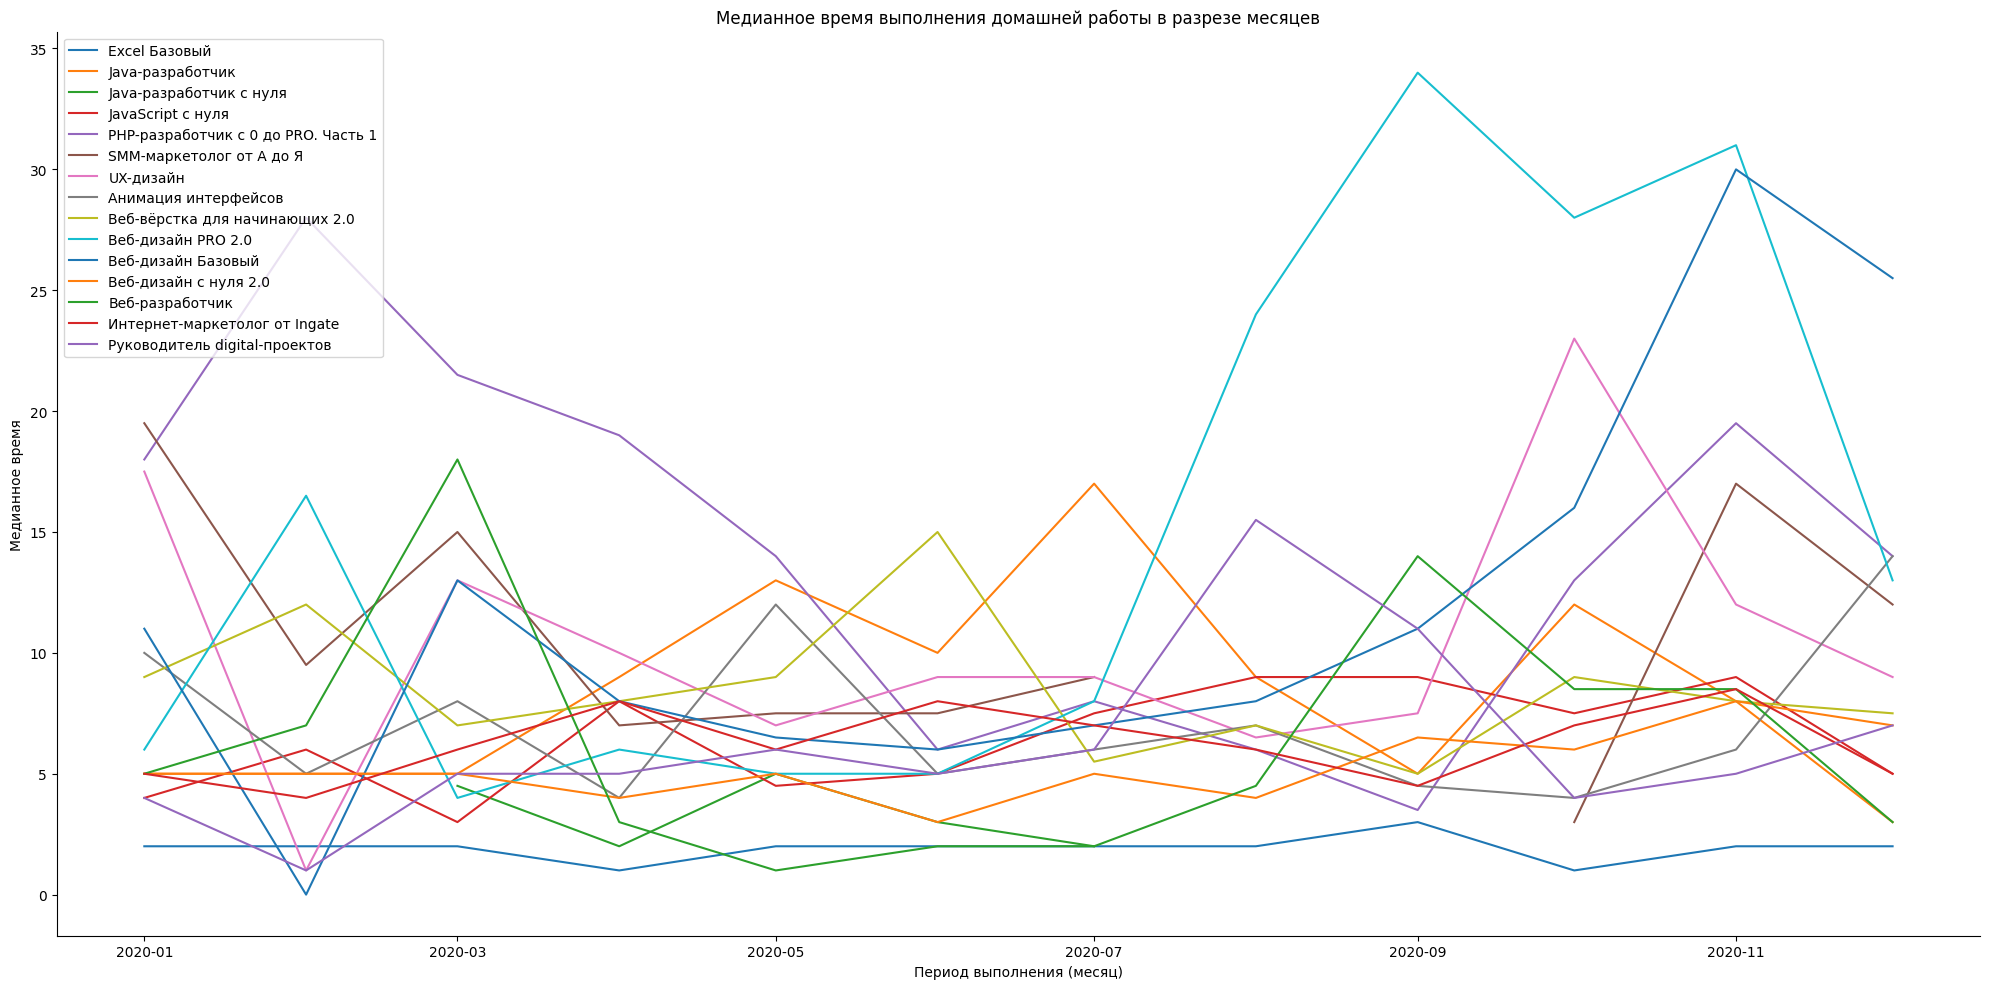

In [ ]:
# Создание основных объектов графика
fig, ax = plt.subplots(figsize=(20, 10))

# Вывод графика на страницу
modules_df.pivot_table('duration', index='homework_month', columns='course_title', aggfunc=np.median).plot(
    ax=ax, title='Медианное время выполнения домашней работы в разрезе месяцев', x_compat=True)

# Подписание осей координат
ax.set_xlabel('Период выполнения (месяц)')
ax.set_ylabel('Медианное время')

# Скрытие рамки графика
ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)

# Размещение легенды
ax.legend(loc='upper left')

# Автоматическое позиционирование элементов графика
fig.tight_layout()

# Отображение графика на странице
plt.show()

На основании графиков можно сказать, что время выполнения домашних работ на каждом курсе разнородно. На большинстве курсов отмечаются низкие показатели времени, затрачиваемого на домашние задания в период мая 2020 года - июля 2020 года. Вероятнее всего это связано со сдачей работ в сезон отпусков и каникул, когда студенты, независимо от возвраста, имеют больше времени на задания выбранного курса, нежели во время осени, зимы и весны, когда преобладает основное место работы или учебы

## 4. Расчет конверсии

1. Посчитаем конверсию перехода студентов из одного модуля в другой на каждом курсе по формуле - отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считаем по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считаем по последнему дз в модуле).
2. Построим bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе.
3. Построим горизонтальный график, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе.
4. Сделаем аналитический вывод

In [ ]:
# Формирование датасета через группировку по модулю и студенту
# с определением дат начала и окончания всех домашних заданий в модуле
conversion_df = main.loc[
    main['is_homework']==True,
    ['course_title', 'course_field', 'module_number', 'module_title', 'student_id', 'start_date', 'finish_date']
].groupby(
    ['course_title', 'course_field', 'module_number', 'module_title', 'student_id']
).aggregate(
    {'start_date': np.min, 'finish_date': np.max}
)

# Перегруппировка датасета по модулю c подсчетом
# количества студентов начавших и завершивших обучение
conversion_df = conversion_df.assign(
    student_start=conversion_df['start_date'].notnull(), student_finish=conversion_df['finish_date'].notnull()
).groupby(
    ['course_title', 'course_field', 'module_number', 'module_title']
).aggregate(
    {'student_start': np.sum, 'student_finish': np.sum, 'start_date': np.min, 'finish_date': np.max}
).sort_index().reset_index()

# Преобразование формата дат к краткому виду
conversion_df['start_date'] = conversion_df['start_date'].values.astype('datetime64[D]')
conversion_df['finish_date'] = conversion_df['finish_date'].values.astype('datetime64[D]')

# Расчет конверсии и добавление значений в датасет
for course in conversion_df['course_title'].unique():
    for index, module_number in conversion_df.loc[conversion_df['course_title']==course, 'module_number'].items():
        # Определение количества студентов, начавших обучение в текущем модуле
        student_start = conversion_df.loc[index, 'student_start']
        # Определение количества студентов, завершивших обучение в предыдущем модуле
        student_finish = conversion_df.loc[
            (conversion_df['course_title']==course) &
            (conversion_df['module_number'] < module_number),
            'student_finish'].tail(1).min()
        # Подсчет конверсии текущего модуля
        conversion_df.loc[index, 'conversion'] = student_start / student_finish if student_finish > 0 else 0

# Вывод первых 5-ти позиций
conversion_df.head()

course_title course_field  module_number  \
0  Excel Базовый     Business              1   
1  Excel Базовый     Business              2   
2  Excel Базовый     Business              3   
3  Excel Базовый     Business              4   
4  Excel Базовый     Business              5   

                                        module_title  student_start  \
0                          Основной функционал Excel             98   
1            Основной функционал Excel (продолжение)             86   
2                  Формулы и функции Excel. Введение             80   
3  Формулы и функции Excel. Продолжаем работать с...             66   
4     Формулы и функции Excel. Более сложные формулы             54   

   student_finish start_date finish_date  conversion  
0              85 2018-02-19  2019-07-16    0.000000  
1              80 2018-02-19  2019-07-16    1.011765  
2              80 2018-02-19  2019-07-16    1.000000  
3              59 2018-02-19  2019-07-13    0.825000  
4              51 2018-02-19  2019-07-17    0.915254

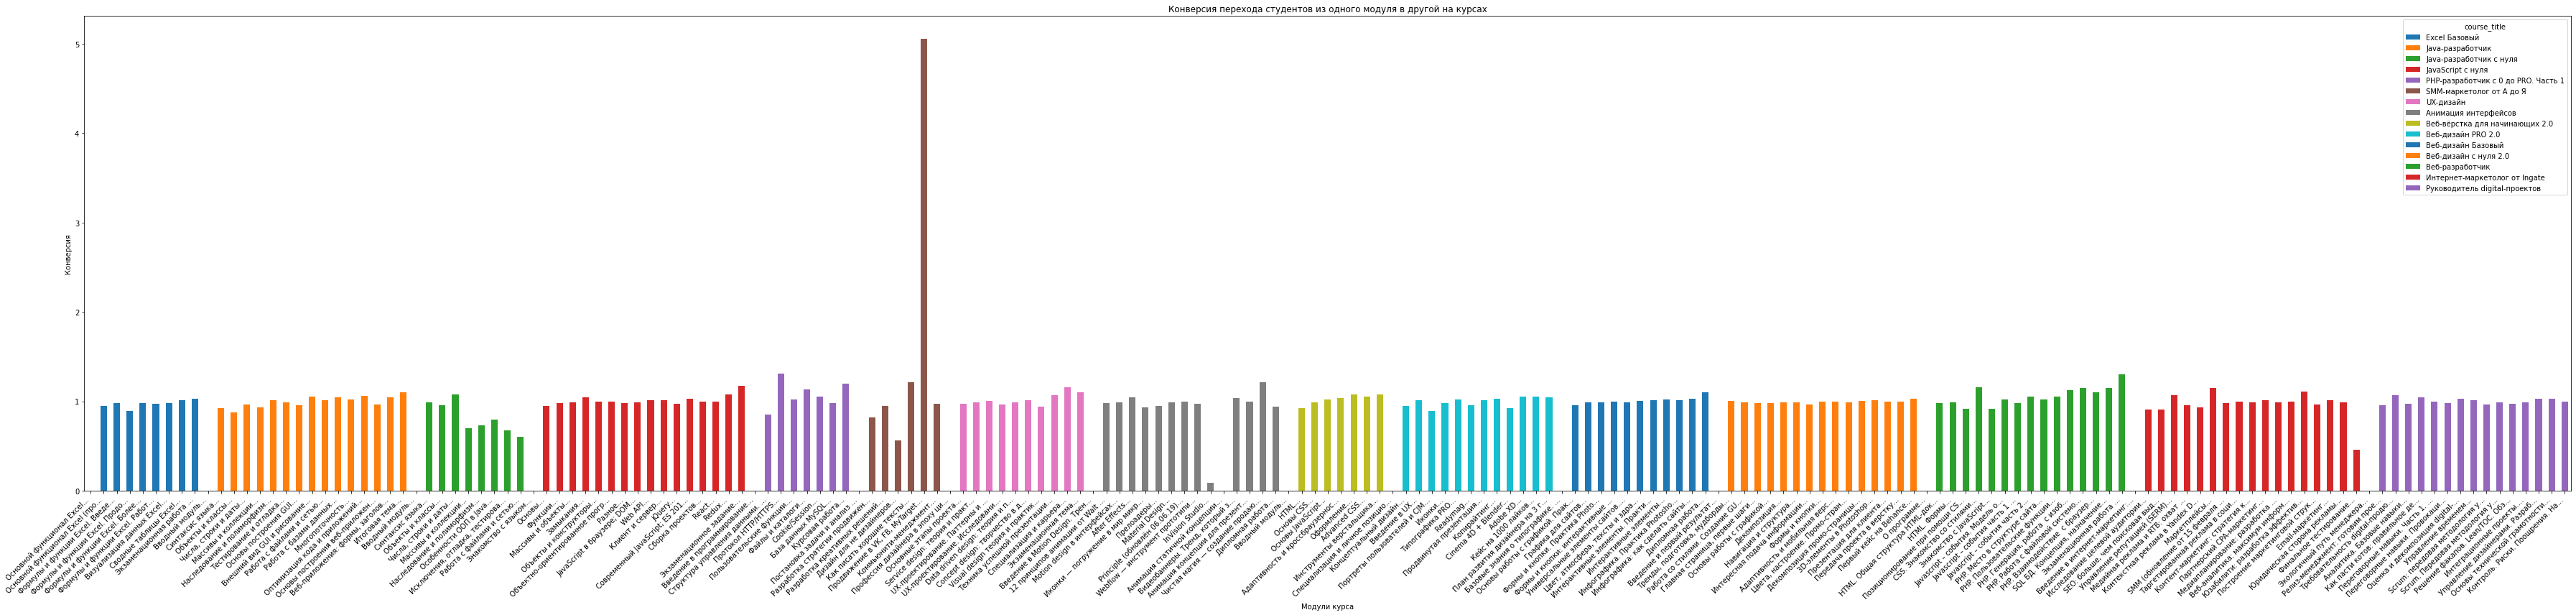

In [ ]:
# Определение основных объектов диаграммы
fig, ax = plt.subplots(figsize=(50, 12))

# Вывод диаграммы на страницу
conversion_df.pivot_table(
    values='conversion', index=conversion_df.index, columns='course_title'
).plot.bar(
    ax=ax, title='Конверсия перехода студентов из одного модуля в другой на курсах', stacked=True
)

# Вывод подписей делений оси абсцисс
ax.set_xticklabels(conversion_df['module_title'].apply(lambda x: f'{x[:30]}...'), rotation=45, ha='right')

# Вывод подписей осей координат
ax.set_xlabel('Модули курса')
ax.set_ylabel('Конверсия')

fig.tight_layout()
plt.show()

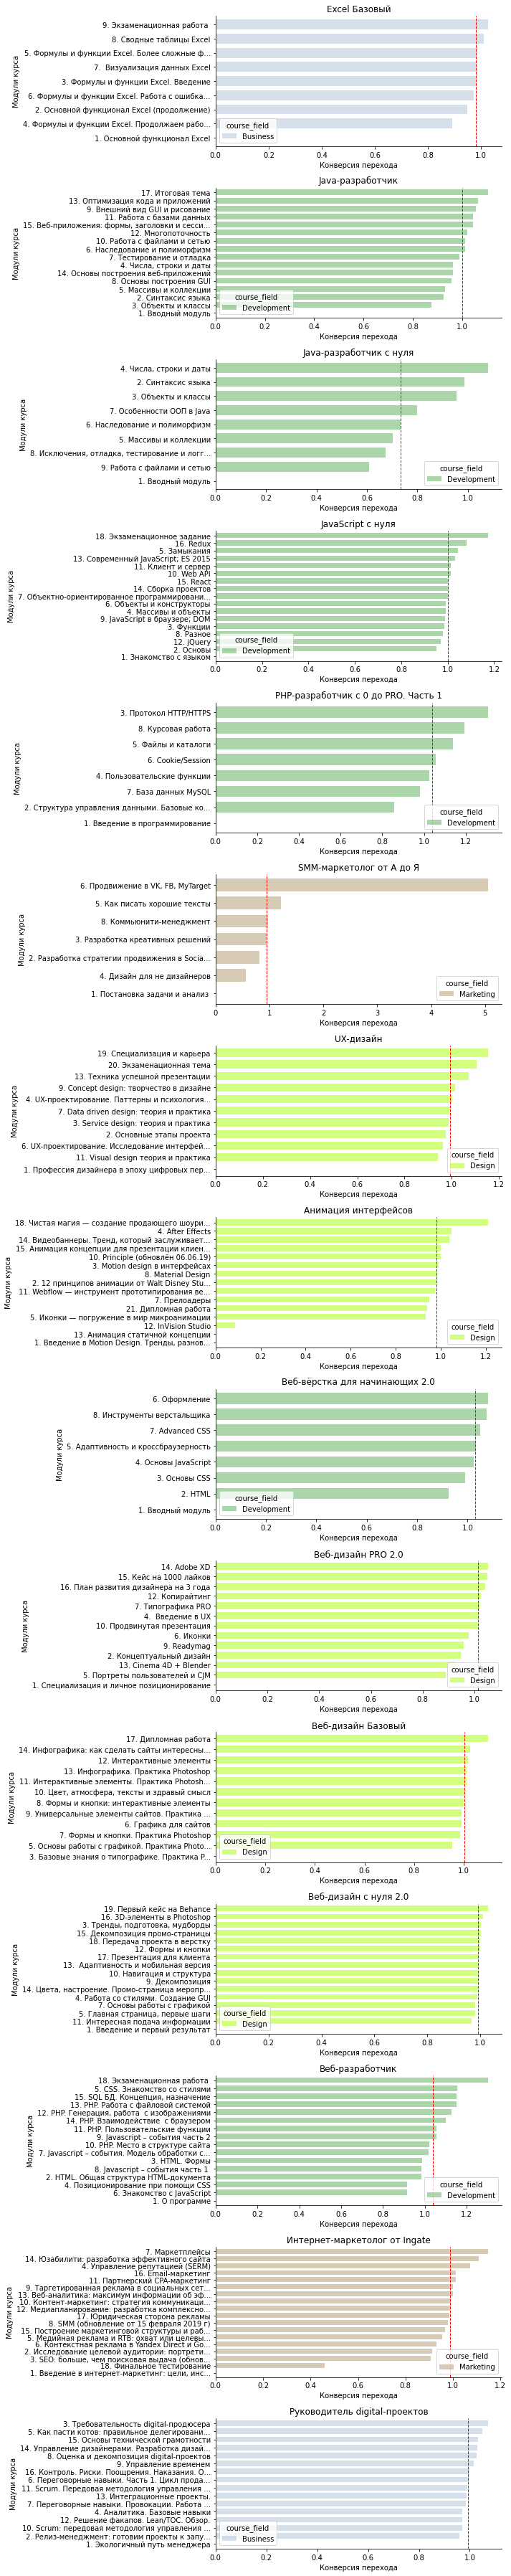

In [ ]:
# Импортирование библиотеки цветов matplotlib
import matplotlib.colors as colors

# Определение основных объектов диаграммы
fig, ax = plt.subplots(15, 1, figsize=(10, 50))

# Формирование списка курсов
courses = np.sort(conversion_df['course_title'].unique())

# Формирование словаря из сферы курса и цвета
colors = dict(zip(conversion_df['course_field'].unique(), colors.XKCD_COLORS))

# Вывод диаграмм на страницу
for index, ax in enumerate(ax.flat):
    # Определение датасета курса
    chart_df = conversion_df[conversion_df['course_title']==courses[index]].\
                                                  sort_values('conversion').\
                                                  reset_index(drop=True)
    # Вывод диаграммы на страницу
    chart_df.pivot_table(
        values='conversion', index=chart_df.index, columns='course_field'
    ).plot.barh(ax=ax, width=0.7, title=titles[index],
                color=colors[chart_df['course_field'].unique()[0]], alpha=0.5)

    # Вывод линии медианы на диаграмму для каждого графика
    ax.vlines(chart_df['conversion'].median(), ax.get_ylim()[0], ax.get_ylim()[1],
                                                                 color='r',
                                                                 linestyles='dashed',
                                                                 linewidth=1)
    # Вывод подписей делений оси ординат
    ax.set_yticklabels(
        chart_df[['module_number', 'module_title']].apply(
            lambda x: '{}. {}'.format(x['module_number'],
                                      x['module_title'][:40] + '...'
                                      if len(x['module_title']) > 40
                                      else x['module_title']), axis=1))
    # Вывод подписей осей координат
    ax.set_xlabel('Конверсия перехода')
    ax.set_ylabel('Модули курса')
    # Скрытие рамки диаграммы
    ax.spines['top'].set_color(None)
    ax.spines['right'].set_color(None)

# Автоматическое позиционирование элементов диаграммы
fig.tight_layout()

# Отображение диаграмм на странице
plt.show()

В соответствии с общей диаграммой конверсии перехода студентов из одного модуля в другой можно отметить, что на диаграмме
присутствует резкие скачок и падение значений конверсии. Скачок конверсии приходится на курс
"SMM-маркетолог от А до Я", показатели которого на диаграмме окрашены в коричневый цвет. Такое поведение обусловлено
малыми значениями по выполнению домашних заданий, что и привело к резкому увеличению показателя конверсии между четвертым и
пятым модулями. Спад значения конверсии приходится на курс "Анимация интерфейсов". Провал в конверсии сформировался
ввиду отсутствия завершенных домашних заданий по модулю "InVision Studio", в результате значение конверсии следующего модуля
ушло в ноль. Значения конверсии остальных курсов изменяются в приемлемом диапазоне.

Анализ конверсии перехода студентов из одного модуля в другой в разрезе каждого курса показывает колебания значений
конверсии и отражает индивидуальное значение медианы для каждого курса. Значения медианы, отраженные на диаграммах показывают
какие курсы нуждаются в увеличении значения конверсии курса, чем ближе значение к 1 тем выше процент перехода студентов от
одного модуля к другому и ниже отсеивание студентов.
